In [1]:
import altair as alt
import pandas as pd
from igraph import Graph

def analyze_subgraph(subgraph):
    report = {}

    # Global Network Characteristics
    report['Density'] = subgraph.density()
    report['Diameter'] = subgraph.diameter()
    report['Average Path Length'] = subgraph.average_path_length()
    report['Global Clustering Coefficient'] = subgraph.transitivity_undirected()

    # Node-Level Metrics
    degrees = subgraph.degree()
    betweenness = subgraph.betweenness()
    closeness = subgraph.closeness()
    eigenvector_centrality = subgraph.eigenvector_centrality()

    report['Degree Distribution'] = degrees
    report['Betweenness Centrality'] = betweenness
    report['Closeness Centrality'] = closeness
    report['Eigenvector Centrality'] = eigenvector_centrality

    # Plots
    # Degree Distribution Plot
    degree_data = pd.DataFrame({'Degree': degrees})
    degree_plot = alt.Chart(degree_data).mark_bar(color="#061727").encode(
        alt.X('Degree:Q', bin=True),
        y='count()'
    ).properties(title='Degree Distribution')

    # Betweenness Centrality Plot
    betweenness_data = pd.DataFrame({'Betweenness': betweenness})
    betweenness_plot = alt.Chart(betweenness_data).mark_bar(color="#061727").encode(
        alt.X('Betweenness:Q', bin=True),
        y='count()'
    ).properties(title='Betweenness Centrality Distribution')

    plots = {
        'Degree Distribution': degree_plot,
        'Betweenness Centrality': betweenness_plot
    }

    return report, plots

# Example usage
subgraph = Graph.Famous('Zachary')  # Using Zachary's Karate Club graph as an example
report, plots = analyze_subgraph(subgraph)

# You can then use report and plots as needed. For example:
plots['Degree Distribution'].display()
plots['Betweenness Centrality'].display()

alt.Chart(...)

alt.Chart(...)

In [4]:
import altair as alt
import pandas as pd
from igraph import Graph
import louvain

def analyze_subgraph(subgraph):
    report = {}

    # Global Network Characteristics
    report['Density'] = subgraph.density()
    report['Diameter'] = subgraph.diameter()
    report['Average Path Length'] = subgraph.average_path_length()
    report['Global Clustering Coefficient'] = subgraph.transitivity_undirected()
    report['Assortativity'] = subgraph.assortativity_degree()

    # Community Detection (Louvain Method)
    partition = louvain.find_partition(subgraph, louvain.ModularityVertexPartition)
    report['Communities'] = partition.membership

    # Node-Level Metrics
    degrees = subgraph.degree()
    betweenness = subgraph.betweenness()
    closeness = subgraph.closeness()
    eigenvector_centrality = subgraph.eigenvector_centrality()

    report['Degree Distribution'] = degrees
    report['Betweenness Centrality'] = betweenness
    report['Closeness Centrality'] = closeness
    report['Eigenvector Centrality'] = eigenvector_centrality

    # Plots
    # Degree Distribution Plot
    degree_data = pd.DataFrame({'Degree': degrees})
    degree_plot = alt.Chart(degree_data).mark_bar(color="#061727").encode(
        alt.X('Degree:Q', bin=True),
        y='count()'
    ).properties(title='Degree Distribution')

    # Betweenness Centrality Plot
    betweenness_data = pd.DataFrame({'Betweenness': betweenness})
    betweenness_plot = alt.Chart(betweenness_data).mark_bar(color="#061727").encode(
        alt.X('Betweenness:Q', bin=True),
        y='count()'
    ).properties(title='Betweenness Centrality Distribution')

    # Community Detection Plot
    community_data = pd.DataFrame({'Community': report['Communities']})
    community_plot = alt.Chart(community_data).mark_bar(color="#061727").encode(
        alt.X('Community:O'),
        y='count()'
    ).properties(title='Community Distribution')

    plots = {
        'Degree Distribution': degree_plot,
        'Betweenness Centrality': betweenness_plot,
        'Community Distribution': community_plot
    }

    return report, plots

# Example usage
subgraph = Graph.Famous('Zachary')  # Using Zachary's Karate Club graph as an example
report, plots = analyze_subgraph(subgraph)

# You can then use report and plots as needed. For example:
plots['Degree Distribution'].display()
plots['Betweenness Centrality'].display()
plots['Community Distribution'].display()

<ipython-input-4-b66a68c79abd>:4: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [3]:
!pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 2.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


AttributeError: 'WebDriver' object has no attribute 'find_element_by_id'

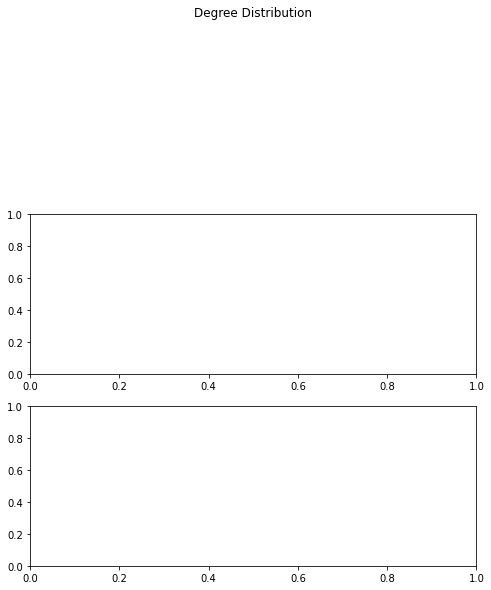

In [5]:
import altair as alt
import pandas as pd
from igraph import Graph
import louvain
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_subgraph(subgraph, report_filename):
    report = {}

    # Set plot size
    plot_width, plot_height = 300, 200

    # Global Network Characteristics
    report['Density'] = subgraph.density()
    report['Diameter'] = subgraph.diameter()
    report['Average Path Length'] = subgraph.average_path_length()
    report['Global Clustering Coefficient'] = subgraph.transitivity_undirected()
    report['Assortativity'] = subgraph.assortativity_degree()

    # Community Detection (Louvain Method)
    partition = louvain.find_partition(subgraph, louvain.ModularityVertexPartition)
    report['Communities'] = partition.membership

    # Node-Level Metrics
    degrees = subgraph.degree()
    betweenness = subgraph.betweenness()
    closeness = subgraph.closeness()
    eigenvector_centrality = subgraph.eigenvector_centrality()

    # Function to generate plots with KDE
    def make_plot(data, x_value, title):
        base = alt.Chart(data).encode(x=x_value).properties(width=plot_width, height=plot_height)
        hist = base.mark_bar(color="#061727", opacity=0.5).encode(y='count()')
        kde = base.transform_density(
            density=x_value,
            as_=[x_value, 'density']
        ).mark_line().encode(y='density:Q')
        return (hist + kde).properties(title=title)

    # Degree Distribution Plot
    degree_data = pd.DataFrame({'Degree': degrees})
    degree_plot = make_plot(degree_data, 'Degree:Q', 'Degree Distribution')

    # Betweenness Centrality Plot
    betweenness_data = pd.DataFrame({'Betweenness': betweenness})
    betweenness_plot = make_plot(betweenness_data, 'Betweenness:Q', 'Betweenness Centrality Distribution')

    # Community Detection Plot
    community_data = pd.DataFrame({'Community': report['Communities']})
    community_plot = alt.Chart(community_data).mark_bar(color="#061727").encode(
        alt.X('Community:O'),
        y='count()'
    ).properties(title='Community Distribution', width=plot_width, height=plot_height)

    plots = [degree_plot, betweenness_plot, community_plot]

    # Create PDF Report
    with plt.rc_context(rc={'text.usetex': False}):  # Ensure TeX is disabled for matplotlib
        fig, axes = plt.subplots(len(plots), 1, figsize=(8, 10))

        for ax, plot in zip(axes, plots):
            ax.axis('off')
            ax.set_title(plot.title)
            plot.save(f'{plot.title}.png')
            img = plt.imread(f'{plot.title}.png')
            ax.imshow(img)
        
        plt.savefig(report_filename, format='pdf')
        plt.close()

    return report

# Example usage
subgraph = Graph.Famous('Zachary')  # Using Zachary's Karate Club graph as an example
report = analyze_subgraph(subgraph, 'subgraph_report.pdf')

In [6]:
import altair as alt
import numpy as np
import pandas as pd
from igraph import Graph
import tempfile
import webbrowser
import os

def analyze_subgraph(subgraph, report_filename):
    # Topological Measure
    diameter = subgraph.diameter()
    print(f"Diameter: {diameter}")

    # Metric 1 related to phase transition (Assumed for illustration)
    clustering_coefficient = subgraph.transitivity_avglocal_undirected()
    print(f"Clustering Coefficient: {clustering_coefficient}")

    # Metric 2 related to phase transition (Assumed for illustration)
    average_path_length = np.mean(subgraph.shortest_paths())
    print(f"Average Path Length: {average_path_length}")

    # Histogram plot of degrees
    degree_data = pd.DataFrame({'Degree': subgraph.degree()})
    degree_plot = alt.Chart(degree_data).mark_bar(color="#061727").encode(
        alt.X('Degree:Q', bin=True),
        y='count()'
    ).properties(
        title='Degree Distribution',
        width=500,
        height=300
    )

    # Clustering Coefficient plot
    clustering_data = pd.DataFrame({'Clustering Coefficient': [clustering_coefficient]})
    clustering_plot = alt.Chart(clustering_data).mark_bar(color="#0964A0").encode(
        x='Clustering Coefficient:Q',
        y='count()'
    ).properties(
        title='Clustering Coefficient',
        width=500,
        height=300
    )

    # Community detection plot
    communities = subgraph.community_multilevel()
    subgraph.vs['community'] = communities.membership
    community_plot = alt.Chart(pd.DataFrame({'Community': communities.membership})).mark_bar(color="#B36B00").encode(
        x='Community:Q',
        y='count()'
    ).properties(
        title='Community Structure',
        width=500,
        height=300
    )

    # Combine plots into a list
    plots = [degree_plot, clustering_plot, community_plot]

    # Create temporary HTML file
    with tempfile.NamedTemporaryFile(delete=False, suffix=".html") as tmpfile:
        html_filename = tmpfile.name

    # Save each plot to the temporary HTML file
    with open(html_filename, "w") as f:
        for plot in plots:
            f.write(plot.to_html())

    # Open temporary HTML file in the default web browser
    webbrowser.open('file://' + os.path.realpath(html_filename))

# Example usage
subgraph = Graph.Famous('Zachary')  # Using Zachary's Karate Club graph as an example
analyze_subgraph(subgraph, 'subgraph_report.html')

Diameter: 5
Clustering Coefficient: 0.5879305533048848
Average Path Length: 2.337370242214533


<ipython-input-6-cab1390f2156>:19: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  average_path_length = np.mean(subgraph.shortest_paths())


In [7]:
import numpy as np

def apply_debtrank(subgraph, patient_zero_index):
    # Define the adjacency matrix (obligations between entities)
    adjacency_matrix = np.array(subgraph.get_adjacency().data)
    
    # Define the economic value of each node
    economic_value = np.sum(adjacency_matrix, axis=1)
    
    # Initialize distress propagation
    distress = np.zeros_like(economic_value)
    distress[patient_zero_index] = economic_value[patient_zero_index]
    
    # Define the impact matrix
    impact_matrix = adjacency_matrix / economic_value[:, np.newaxis]
    
    # Iterate to propagate distress
    for _ in range(len(subgraph.vs)):
        distress_propagation = impact_matrix.dot(distress)
        distress = np.clip(distress + distress_propagation, 0, economic_value)
        
    # Normalize the distress values
    dependency_degree = distress / economic_value

    return dependency_degree

In [14]:
import igraph as ig


# Load the graph
file_name = "financial_graph_2023-06_sample_patient_zero_1000.graphml"
financial_graph = ig.read(file_name)

def find_index_by_attribute(graph, attribute_name, value):
    for vertex in graph.vs:
        if vertex[attribute_name] == value:
            return vertex.index
    raise ValueError(f"No vertex found with {attribute_name} = {value}")

# Given patient zero ID
patient_zero_id = '1000'

# Find the corresponding index in the graph
patient_zero_index = find_index_by_attribute(financial_graph, 'name', patient_zero_id)

# Apply DebtRank
dependency_degree = apply_debtrank(financial_graph, patient_zero_index)

# Print the results
print(dependency_degree)



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
first_vertex = financial_graph.vs[0]
print(first_vertex.attributes())

{'name': '1000', 'id': 'n0'}


In [15]:
from igraph import Graph
import numpy as np

def apply_cascade_failure(graph, patient_zero_index, failure_threshold=0.5, failure_ratio=0.5):
    # Initialize failure array with zeros, and set the patient zero node to fail
    failure = np.zeros(graph.vcount())
    failure[patient_zero_index] = 1

    # Continue until no more nodes fail
    while True:
        # Calculate distress propagation
        new_failure = failure.copy()
        for vertex in graph.vs:
            if failure[vertex.index] == 1:
                for neighbor in vertex.neighbors():
                    new_failure[neighbor.index] += failure_ratio * failure[vertex.index]

        # Check for nodes that exceed the failure threshold
        nodes_failed = False
        for i, fail_amount in enumerate(new_failure):
            if fail_amount >= failure_threshold and failure[i] == 0:
                failure[i] = 1
                nodes_failed = True

        # Break if no more nodes failed in this iteration
        if not nodes_failed:
            break

    return failure

In [16]:
# Apply cascade failure model to patient zero
patient_zero_index = find_index_by_attribute(financial_graph, 'name', '1000') # or appropriate index
failure_result = apply_cascade_failure(financial_graph, patient_zero_index)

# Print the result
print(failure_result)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
subgraph

In [18]:
def apply_fractional_dependency(graph, patient_zero_index, propagation_factor=0.5, max_iterations=100):
    # Initialize the distress array with zeros, and set the patient zero node to initial distress
    distress = np.zeros(graph.vcount())
    distress[patient_zero_index] = 1
    
    # Iterate to propagate distress
    for iteration in range(max_iterations):
        new_distress = distress.copy()
        for vertex in graph.vs:
            # If the node is not patient zero, calculate propagated distress
            if vertex.index != patient_zero_index:
                incoming_distress = 0
                for edge in vertex.all_edges():
                    neighbor = edge.target_vertex if edge.source == vertex.index else edge.source_vertex
                    # Propagate distress based on edge weight and propagation factor
                    incoming_distress += distress[neighbor.index] * edge['weight'] * propagation_factor

                # Update the distress for this node
                new_distress[vertex.index] = incoming_distress

        # Check for convergence (no significant change in distress)
        if np.allclose(new_distress, distress, atol=1e-6):
            break

        distress = new_distress

    return distress

In [19]:
# Assuming financial_graph is already loaded, and patient_zero_index is the index of the patient zero node
dependency_degree = apply_fractional_dependency(financial_graph, patient_zero_index)

# Print the results
for vertex, dependency in enumerate(dependency_degree):
    print(f'Node {vertex}: Dependency Degree = {dependency}')

KeyError: 'Attribute does not exist'

In [21]:
def apply_pagerank(graph, damping=0.85):
    # Apply the PageRank algorithm
    pagerank_scores = graph.pagerank(damping=damping)
    
    return pagerank_scores

# Apply PageRank to the financial_graph
pagerank_scores = apply_pagerank(financial_graph)

# Print the results
for vertex, score in enumerate(pagerank_scores):
    print(f'Node {vertex}: PageRank Score = {score}')

Node 0: PageRank Score = 0.014283850529460664
Node 1: PageRank Score = 0.022707043124506224
Node 2: PageRank Score = 0.018367212238095842
Node 3: PageRank Score = 0.015486642501744053
Node 4: PageRank Score = 0.011119423305484353
Node 5: PageRank Score = 0.02143153437762113
Node 6: PageRank Score = 0.008930150475409356
Node 7: PageRank Score = 0.014924793936836614
Node 8: PageRank Score = 0.0023437500000000003
Node 9: PageRank Score = 0.01082100338675978
Node 10: PageRank Score = 0.007294798497827415
Node 11: PageRank Score = 0.01614949512414578
Node 12: PageRank Score = 0.013962607227397925
Node 13: PageRank Score = 0.017910907324834704
Node 14: PageRank Score = 0.0243153382046281
Node 15: PageRank Score = 0.02232368298748336
Node 16: PageRank Score = 0.026664435608329436
Node 17: PageRank Score = 0.030041874228533865
Node 18: PageRank Score = 0.015506944708692965
Node 19: PageRank Score = 0.02829664304293942
Node 20: PageRank Score = 0.027914792832834552
Node 21: PageRank Score = 0.0

In [23]:
import networkx as nx

def apply_personalized_pagerank(igraph_graph, patient_zero_index, alpha=0.85):
    # Convert the igraph graph to a NetworkX graph
    nx_graph = nx.Graph(igraph_graph.get_edgelist())

    # Create a personalization vector where all the weight is on the patient_zero_index node
    personalization = {node: 2 for node in nx_graph.nodes()}
    personalization[patient_zero_index] = 1

    # Compute personalized PageRank
    pagerank_scores = nx.pagerank(nx_graph, alpha=alpha, personalization=personalization)

    return pagerank_scores

# Example usage
patient_zero_index = 0  # Change this to your patient zero's index
pagerank_scores = apply_personalized_pagerank(financial_graph, patient_zero_index)

# Print the results
for vertex, score in pagerank_scores.items():
    print(f'Node {vertex}: Personalized PageRank Score = {score}')

Node 0: Personalized PageRank Score = 0.017527274971375403
Node 1: Personalized PageRank Score = 0.019676521793309375
Node 2: Personalized PageRank Score = 0.01994902368719208
Node 3: Personalized PageRank Score = 0.012782442825372088
Node 4: Personalized PageRank Score = 0.012781346936959898
Node 5: Personalized PageRank Score = 0.018672581430658208
Node 6: Personalized PageRank Score = 0.016470205959796494
Node 7: Personalized PageRank Score = 0.012924217375835935
Node 8: Personalized PageRank Score = 0.007241897782430106
Node 9: Personalized PageRank Score = 0.01690432529907108
Node 10: Personalized PageRank Score = 0.013396207812699424
Node 11: Personalized PageRank Score = 0.01597440293711369
Node 12: Personalized PageRank Score = 0.016695742760129466
Node 13: Personalized PageRank Score = 0.019444638435023993
Node 14: Personalized PageRank Score = 0.014083063554136282
Node 15: Personalized PageRank Score = 0.017855306338964084
Node 16: Personalized PageRank Score = 0.016552596375

In [24]:
from random import random

def independent_cascade(graph, patient_zero_index, activation_prob=0.1):
    # Set the initial active nodes
    active_nodes = set([patient_zero_index])
    newly_activated_nodes = set([patient_zero_index])

    while newly_activated_nodes:
        current_newly_activated_nodes = set()
        for node in newly_activated_nodes:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                # Try to activate the neighbor with probability activation_prob
                if neighbor not in active_nodes and random() < activation_prob:
                    current_newly_activated_nodes.add(neighbor)
                    active_nodes.add(neighbor)
        newly_activated_nodes = current_newly_activated_nodes

    influence_scores = [1 if i in active_nodes else 0 for i in range(len(graph.vs))]
    return influence_scores

# Example usage
financial_graph = Graph.Read('financial_graph_2023-06_sample_patient_zero_1000.graphml')
patient_zero_index = find_index_by_attribute(financial_graph, 'name', '1000')
influence_scores = independent_cascade(financial_graph, patient_zero_index)

print(influence_scores)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
import numpy as np

def proportional_exposure_contagion(graph, patient_zero_index, weights=None):
    # Initialize distress levels, starting with the patient zero node in full distress
    distress_levels = np.zeros(len(graph.vs))
    distress_levels[patient_zero_index] = 1

    # If no weights provided, assume uniform weights
    if weights is None:
        weights = [1] * len(graph.es)

    # Propagate distress until no more changes
    change = True
    while change:
        change = False
        # Iterate over each edge and propagate distress proportionally to the weight
        for edge in graph.es:
            source_index = edge.source
            target_index = edge.target
            weight = weights[edge.index]

            # Compute the distress propagated from source to target
            distress_propagation = distress_levels[source_index] * weight

            # Update the target's distress level and check for changes
            if distress_propagation > distress_levels[target_index]:
                distress_levels[target_index] = distress_propagation
                change = True

    return distress_levels

# Example usage
financial_graph = Graph.Read('financial_graph_2023-06_sample_patient_zero_1000.graphml')
patient_zero_index = find_index_by_attribute(financial_graph, 'name', '1000')
distress_scores = proportional_exposure_contagion(financial_graph, patient_zero_index)

print(distress_scores)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
def proportional_exposure_contagion(graph, patient_zero_index, weights=None, resistance=None):
    # Initialize distress levels, starting with the patient zero node in full distress
    distress_levels = np.zeros(len(graph.vs))
    distress_levels[patient_zero_index] = 1

    # If no weights provided, assume uniform weights
    if weights is None:
        weights = [1] * len(graph.es)

    # If no resistance values provided, assume uniform resistance
    if resistance is None:
        resistance = [0.5] * len(graph.vs)

    # Propagate distress until no more changes
    change = True
    while change:
        change = False
        # Iterate over each edge and propagate distress proportionally to the weight
        for edge in graph.es:
            source_index = edge.source
            target_index = edge.target
            weight = weights[edge.index]

            # Compute the distress propagated from source to target
            distress_propagation = distress_levels[source_index] * weight

            # Apply the resistance value of the target node
            distress_propagation *= (1 - resistance[target_index])

            # Update the target's distress level and check for changes
            if distress_propagation > distress_levels[target_index]:
                distress_levels[target_index] = distress_propagation
                change = True

    return distress_levels

# Example usage
financial_graph = Graph.Read('financial_graph_2023-06_sample_patient_zero_1000.graphml')
patient_zero_index = find_index_by_attribute(financial_graph, 'name', '1000')
resistance_values = [0.5] * len(financial_graph.vs) # You can adjust these values
distress_scores = proportional_exposure_contagion(financial_graph, patient_zero_index, resistance=resistance_values)

print(distress_scores)

[1.     0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.     0.125
 0.25   0.125  0.25   0.25   0.25   0.25   0.125  0.25   0.125  0.25
 0.25   0.25   0.25   0.125  0.125  0.25   0.125  0.125  0.125  0.125
 0.25   0.125  0.125  0.25   0.25   0.25   0.25   0.25   0.25   0.125
 0.125  0.25   0.125  0.125  0.125  0.25   0.125  0.125  0.25   0.25
 0.25   0.25   0.25   0.125  0.125  0.0625 0.25   0.0625 0.125  0.125
 0.125  0.25   0.125  0.0625]


In [28]:
def continuous_si_model(graph, patient_zero_index, rate_of_infection, weights=None):
    # Initialize infection levels, starting with the patient zero node fully infected
    infection_levels = np.zeros(len(graph.vs))
    infection_levels[patient_zero_index] = 1
    
    # If no weights provided, assume uniform weights
    if weights is None:
        weights = [1] * len(graph.es)

    # Propagate infection until no more changes
    change = True
    while change:
        change = False
        # Iterate over each edge and propagate infection proportionally to the weight
        for edge in graph.es:
            source_index = edge.source
            target_index = edge.target
            weight = weights[edge.index]

            # Compute the infection propagated from source to target
            infection_propagation = infection_levels[source_index] * rate_of_infection * weight

            # If the propagated infection is greater than the current infection level, update
            if infection_propagation > infection_levels[target_index]:
                infection_levels[target_index] = infection_propagation
                change = True

    return infection_levels

# Example usage
financial_graph = Graph.Read('financial_graph_2023-05_sample_patient_zero_1000.graphml')
patient_zero_index = find_index_by_attribute(financial_graph, 'name', '1000')
rate_of_infection = 0.2 # You can adjust this value
infection_scores = continuous_si_model(financial_graph, patient_zero_index, rate_of_infection)

print(infection_scores)


[1.     0.2    0.2    0.008  0.008  0.008  0.04   0.008  0.008  0.04
 0.008  0.008  0.04   0.008  0.008  0.0016 0.0016 0.008  0.04   0.0016
 0.008  0.008  0.008  0.008  0.0016 0.04   0.008  0.008  0.008  0.008
 0.008  0.0016 0.04   0.04   0.04   0.008  0.008  0.008  0.008  0.04
 0.008  0.008  0.008  0.008  0.04   0.0016 0.04   0.008  0.0016 0.0016
 0.04   0.04   0.008  0.008  0.     0.04   0.008  0.0016 0.008  0.008 ]
